<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="100" /> 

<center><font color=#555555><font size=6> MAF1731 - Microstructure and Trading Systems </font> <br> <br>
    
<center><font color=#555555><font size=5> Maria Fernanda Amador Alvarez </font> <br> <br> <br> <br>
   
<center> <font color= #555555> <font size = 4> Jan 2023 </a> | <font color= #555555> <font size = 4> Repository: <a href= https://github.com/feramdor/Lab1> Link Repo

<center> <font color= #555555> <font size = 6> Módulo 1 </font> <br> <br> <font color= #555555> <font size = 5> Inversión del capital

# <font color= #6B6B6B> <font size = 5> Abstract </font>

Se tiene 1 millón de pesos y dos opciones para invertirlos. Una opción es hacer una inversión pasiva, comprando el 100% de un ETF que sigue el mercado de renta variable mexicano. La otra opción es hacer una inversión activa, creando un portafolio con los mismos activos que el ETF y haciendo un rebalanceo con un algoritmo específico.

# <font color= #6B6B6B> <font size = 6> 1. Introduction </font>

En este trabajo, se llevaron a cabo dos estrategias de inversión, una pasiva y una activa, para posteriormente comparar sus resultados y concluir cuál podría ser la mejor opción para un inversor que tiene un capital de 1 millón de pesos. Las acciones se tomaron de un índice creado con acciones pertenecientes a la Bolsa Mexicana de Valores, por lo que están listadas en pesos.

En la estrategia pasiva, se simula que se compran las mismas acciones que el índice NAFTRAC en la fecha 0 y no se hace ningún cambio en los títulos, se evalúa el valor de cada cartera mensual y se analizan sus rendimientos. Lo que se intenta simular en la estrategia activa es el rebalanceo del índice NAFTRAC, las ponderaciones de sus activos no son constantes y el índice cambia sus componentes de acuerdo con el desempeño de las compañías con el fin de diversificar sus inversiones y generar un mejor rendimiento.

Finalmente, se toman indicadores de rendimiento de cada estrategia, como el rendimiento promedio, el rendimiento acumulado y la relación Sharpe, para analizar cuál estrategia es mejor.

# <font color= #6B6B6B> <font size = 6 > 2. Install/Load Packages and Depedencies </font>

In [76]:
# Librerias
import pandas as pd
import numpy as np
import scipy.spatial.distance as sc
import matplotlib.pyplot as plt
import functions as fn
import data as dt
import pandas as pd
import numpy as np
from scipy.optimize import minimize

## <font color= #6B6B6B> <font size = 6> 2.1 Files Dependencies </font> <font color= #555555>

A continuación se presentan las dependencias de archivo necesarias para correr este cuaderno.

- files/NAFCTRAC.csv (con las fechas de consulta para cada mes)

# <font color= #6B6B6B> <font size = 6> 3. Data Description </font>

In [57]:
# Obtención de tickers
tickers, cash_tickers, w, w_cash = dt.tickers(dt.file_concat("files"))
pd.DataFrame(tickers)

,0
0,AC*
1,ALFAA
2,ALSEA*
3,AMXL
4,ASURB
5,BBAJIOO
6,BIMBOA
7,BOLSAA
8,CEMEXCPO
9,CUERVO*


In [60]:
# Obtención de precios diarios
fechasCon= dt.fechasConsultaPasiva()
precios = fn.precios(fn.corregir(tickers), start_date = fechasCon[0], end_date = fechasCon[-1] + datetime.timedelta(days = 1),
    fechas_consulta = fechasCon)
precios.head(5)

[*********************100%***********************]  31 of 31 completed
[*********************100%***********************]  1 of 1 completed


,AC.MX,ALFAA.MX,ALSEA.MX,AMXL.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CUERVO.MX,...,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,TLEVISACPO.MX,VESTA.MX,WALMEX.MX,MXN
2021-01-29,93.070000,12.90,23.110001,13.67,322.529999,24.760000,38.520000,46.000000,11.760000,43.730000,...,74.120003,120.989998,44.180000,306.750000,154.059998,107.720001,30.990000,38.650002,58.349998,20.252251
2021-02-26,94.769997,11.39,25.440001,13.39,391.429993,24.030001,39.299999,42.849998,13.940000,43.150002,...,72.239998,121.360001,48.790001,287.149994,153.880005,113.790001,31.129999,39.490002,59.680000,20.910900
2021-03-31,100.849998,11.80,30.280001,13.96,363.029999,27.570000,42.900002,41.250000,14.420000,46.759998,...,73.239998,128.520004,54.570000,263.630005,156.360001,112.419998,36.380001,42.820000,64.470001,20.576000
2021-04-30,108.459999,14.17,32.950001,14.15,342.609985,32.119999,40.540001,44.939999,16.090000,48.310001,...,74.110001,125.959999,56.500000,260.869995,156.539993,110.059998,50.259998,39.480000,66.309998,20.024300
2021-05-31,113.040001,13.98,33.410000,15.58,363.279999,34.590000,43.849998,44.500000,16.809999,50.189999,...,75.910004,128.059998,56.410000,302.589996,159.690002,108.480003,52.900002,41.029999,65.400002,19.926100


# <font color= #6B6B6B> <font size = 6> 4. Inversión Pasiva </font>

Se descargan los precios de YahooFinance para poder realizar la invesión pasiva y hacer los calculos necesarios para analizar los datos

In [74]:
# Inversión Pasiva
inversion_pasiva, inversion_pasiva_inicial = fn.inversion_pasiva(
    precios = precios,
    fechas_consulta = fechasCon,
    w = w,
    cash_w = w_cash,
    c_0 = 1000000,
    tickers = tickers)


c:\Users\Fernanda\OneDrive\Escritorio\Fernanda Amador\9no Semestre\Trading\Lab1\Lab1\functions.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out["Portafolio"][0] = 1000000


In [71]:
pd.DataFrame(inversion_pasiva_inicial)

,Ticker,Peso(%),Precio,Acciones,Total
0,AC*,2.36,93.07,253.0,23546.71
1,ALFAA,1.30,12.90,1007.0,12990.30
2,ALSEA*,0.66,23.11,285.0,6586.35
3,AMXL,11.61,13.67,8493.0,116099.31
4,ASURB,3.12,322.53,96.0,30962.88
5,BBAJIOO,1.65,24.76,666.0,16490.16
6,BIMBOA,4.00,38.52,1038.0,39983.76
7,BOLSAA,0.56,46.00,121.0,5566.00
8,CEMEXCPO,4.42,11.76,3758.0,44194.08
9,CUERVO*,0.65,43.73,148.0,6472.04


Podemos observar en el DataFrame los pesos iniciales para cada activo del NATFRAC con el que estamos trabajando.

### Rendimiento y Rendimiento Acumulado

En el siguiente paso, sacamos el Rendimiento y el Rendimiento Acumulado.

In [77]:
plot = pd.DataFrame(inversion_pasiva)
plot

,Fecha,Portafolio,Rend (%),Acum
0,2021-01-29,1000000.00,NaN,NaN
1,2021-02-26,1034965.63,3.48,3.48
2,2021-03-31,1083582.65,4.70,8.17
3,2021-04-30,1084179.30,0.06,8.23
4,2021-05-31,1154148.38,6.45,14.68
5,2021-06-30,1137119.37,-1.48,13.21
6,2021-07-30,1157902.01,1.83,15.03
7,2021-08-31,1207198.70,4.26,19.29
8,2021-09-30,1186411.17,-1.72,17.57
9,2021-10-26,1205778.34,1.63,19.20


Text(0.5, 1.0, 'Rendimiento del Portafolio')

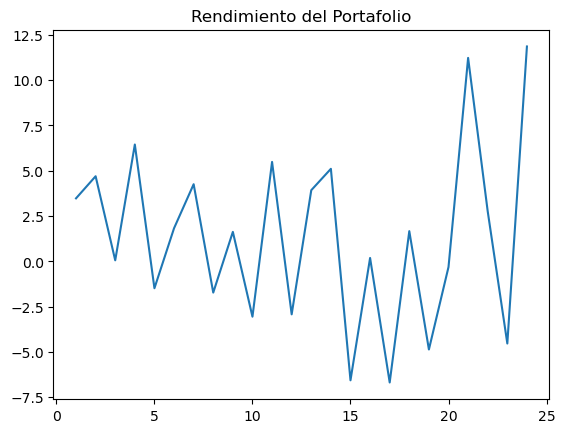

In [89]:
plot['Rend (%)'].plot()
plt.title('Rendimiento del Portafolio')

Text(0.5, 1.0, 'Acumulado del Portafolio')

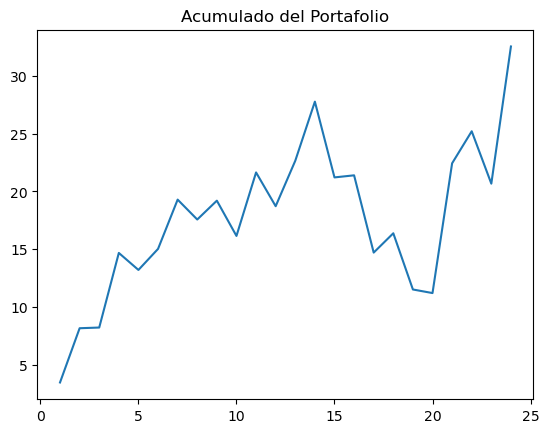

In [91]:
plot['Acum'].plot()
plt.title('Acumulado del Portafolio')

Text(0.5, 1.0, 'Evolución del Capital')

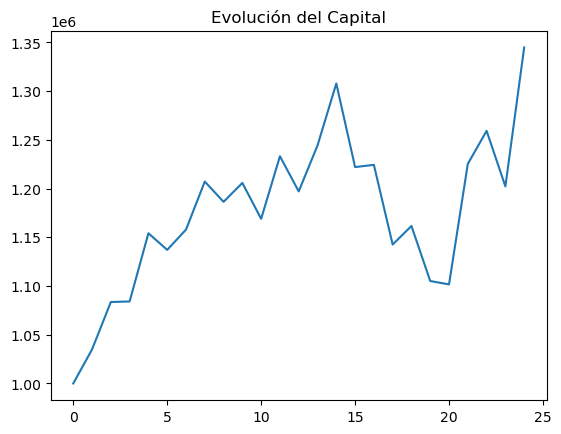

In [92]:
plot['Portafolio'].plot()
plt.title('Evolución del Capital')

### Conclusión Inversión Pasiva
Podemos observar buenos rendimientos en esta inversión pasiva, por lo tanto, podemos concluir que es una buena decisión invertir en la inversión pasiva por los resultados previamente obtenidos.

# <font color= #6B6B6B> <font size = 6> 5. Inversión Activa </font>

In [ ]:
# Inversión Activa


# <font color= #6B6B6B> <font size = 6> 6. Medidas de Atribución al Desempeño </font>

In [ ]:
#Medidas